In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import river as ri
import numpy as np
import scipy
import datetime
# import test

In [4]:
scipy.stats.chi2.ppf(.01, 2)

0.020100671707002873

In [16]:
# stream = ri.synth.ConceptDriftStream(stream=ri.synth.LED(seed=42, noise_percentage=0.10, irrelevant_features=True),
#                                      drift_stream=ri.synth.LED(seed=42, noise_percentage=0.05, irrelevant_features=True),
#                                      seed=42, position=2500,
#                                      width=200).take(5000)

stream = ri.synth.LEDDrift(seed = 42, noise_percentage=0.10, irrelevant_features=True, n_drift_features=4).take(4000)

# nodrift = ri.synth.LED(seed=42, noise_percentage=0.10, irrelevant_features=True).take(4000)
# (x, y) = next(iter(nodrift))

# print(x, y)
nodrift = ri.synth.STAGGER(seed=42).take(4000)

# nominal_attributes=["shape", "color", "size"]
randTree = ri.tree.OLINTreeClassifier(nominal_attributes=["shape", "color", "size"])


randTreeMetric = ri.metrics.Accuracy()
ri.evaluate.progressive_val_score(nodrift, randTree, randTreeMetric,
                                  print_every = 20, show_time = True, show_memory = True, delay=10);


[20] Accuracy: 0.00% – 00:00:00 – 23.18 KB
[40] Accuracy: 94.12% – 00:00:00 – 29 KB
[60] Accuracy: 97.30% – 00:00:00 – 34.81 KB
[80] Accuracy: 91.23% – 00:00:00 – 20.84 KB
[100] Accuracy: 92.21% – 00:00:00 – 26.62 KB
[120] Accuracy: 89.69% – 00:00:00 – 32.43 KB
[140] Accuracy: 90.60% – 00:00:00 – 47.18 KB
[160] Accuracy: 89.05% – 00:00:00 – 53.08 KB
[180] Accuracy: 89.17% – 00:00:00 – 58.83 KB
[200] Accuracy: 89.27% – 00:00:00 – 64.62 KB
[220] Accuracy: 89.85% – 00:00:00 – 78.12 KB
[240] Accuracy: 90.78% – 00:00:00 – 83.92 KB
[260] Accuracy: 91.56% – 00:00:00 – 89.73 KB
[280] Accuracy: 92.22% – 00:00:00 – 95.58 KB
[300] Accuracy: 92.78% – 00:00:00 – 101.2 KB
[320] Accuracy: 93.27% – 00:00:00 – 107.04 KB
[340] Accuracy: 93.69% – 00:00:00 – 112.92 KB
[360] Accuracy: 94.07% – 00:00:00 – 118.54 KB
[380] Accuracy: 94.40% – 00:00:00 – 124.45 KB
[400] Accuracy: 94.69% – 00:00:00 – 130.36 KB
[420] Accuracy: 94.96% – 00:00:00 – 135.98 KB
[440] Accuracy: 95.20% – 00:00:00 – 141.92 KB
[460] Accur

[3,820] Accuracy: 99.47% – 00:00:01 – 327.77 KB
[3,840] Accuracy: 99.48% – 00:00:01 – 333.4 KB
[3,860] Accuracy: 99.48% – 00:00:01 – 339.02 KB
[3,880] Accuracy: 99.48% – 00:00:01 – 344.65 KB
[3,900] Accuracy: 99.48% – 00:00:01 – 350.27 KB
[3,920] Accuracy: 99.49% – 00:00:01 – 327.77 KB
[3,940] Accuracy: 99.49% – 00:00:01 – 333.4 KB
[3,960] Accuracy: 99.49% – 00:00:01 – 339.02 KB
[3,980] Accuracy: 99.49% – 00:00:01 – 344.65 KB
[4,000] Accuracy: 99.50% – 00:00:01 – 350.27 KB



(dot.exe:14740): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


{'n_nodes': 7, 'n_branches': 2, 'n_leaves': 5, 'n_active_leaves': 5, 'n_inactive_leaves': 0, 'height': 3, 'total_observed_weight': 1000.0}


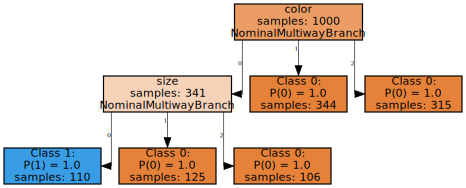

In [17]:
print(randTree.summary)
randTree.draw()

In [ ]:
randTree.to_dataframe()

In [9]:
# stream = ri.synth.ConceptDriftStream(stream=ri.synth.SEA(seed=42, noise =.28, variant =2),
#                                      drift_stream=ri.synth.SEA(seed=42, noise =.28, variant =3),
#                                      seed=42, position=24975,
#                                      width=50).take(50000)

# stream = ri.synth.LEDDrift(seed = 42, noise_percentage = 0.28,
#                           irrelevant_features= True, n_drift_features=4).take(2000)

# stream = ri.synth.RandomRBFDrift(seed_model=42, seed_sample=42,
#                                 n_classes=4, n_features=4, n_centroids=20,
#                                 change_speed=1.2, n_drift_centroids=10).take(50000)

# stream = ri.sywnth.ConceptDriftStream(seed=42, position=24975, width=50).take(50000)

stream = ri.synth.ConceptDriftStream(stream=ri.synth.STAGGER(seed=42, classification_function =0),
                                     drift_stream=ri.synth.STAGGER(seed=42, classification_function = 2),
                                     seed=42, position=24900,
                                     width=200).take(10000)

# nodrift = ri.synth.STAGGER(seed=42, classification_function =0).take(5000)

nodrift = ri.synth.LED(seed=42, noise_percentage=0.10, irrelevant_features=True).take(4000)

# stream = ri.synth.ConceptDriftStream(stream=ri.synth.Agrawal(seed=42, 
#                                                              perturbation = .25, classification_function =0),
#                                      drift_stream=ri.synth.Agrawal(seed=42, 
#                                                                    perturbation = .1, classification_function = 2),
#                                      seed=42, position=24900,
#                                      width=200).take(3000)
    
vfdTreeee = ri.tree.HoeffdingTreeClassifier(nominal_attributes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22], leaf_prediction="mc")

vfdTreeMetric = ri.metrics.Accuracy()

# for x,y in nodrift:
#     y_pred = vfdTreeee.predict_one(x)
#     print("True: ", y, " Pred: ", y_pred)
#     vfdTreeMetric.update(y_pred, y)
#     print(vfdTreeMetric)
#     vfdTreeee.learn_one(x,y)

vfdTreeMetric = ri.metrics.Accuracy()
ri.evaluate.progressive_val_score(nodrift, vfdTreeee, vfdTreeMetric,
                                  print_every = 20, show_time = True, show_memory = True, delay=10);

[20] Accuracy: 0.00% – 00:00:00 – 86.86 KB
[40] Accuracy: 3.33% – 00:00:00 – 95.38 KB
[60] Accuracy: 4.00% – 00:00:00 – 96.55 KB
[80] Accuracy: 7.14% – 00:00:00 – 97.02 KB
[100] Accuracy: 10.00% – 00:00:00 – 97.16 KB
[120] Accuracy: 10.00% – 00:00:00 – 97.35 KB
[140] Accuracy: 10.00% – 00:00:00 – 97.4 KB
[160] Accuracy: 9.33% – 00:00:00 – 97.49 KB
[180] Accuracy: 8.82% – 00:00:00 – 97.51 KB
[200] Accuracy: 8.42% – 00:00:00 – 97.56 KB
[220] Accuracy: 8.57% – 00:00:00 – 97.56 KB
[240] Accuracy: 8.26% – 00:00:00 – 97.56 KB
[260] Accuracy: 8.00% – 00:00:00 – 97.56 KB
[280] Accuracy: 7.78% – 00:00:00 – 97.58 KB
[300] Accuracy: 7.59% – 00:00:00 – 97.61 KB
[320] Accuracy: 7.74% – 00:00:00 – 97.63 KB
[340] Accuracy: 8.48% – 00:00:00 – 97.63 KB
[360] Accuracy: 9.14% – 00:00:00 – 97.63 KB
[380] Accuracy: 9.19% – 00:00:00 – 97.63 KB
[400] Accuracy: 8.72% – 00:00:00 – 97.63 KB
[420] Accuracy: 8.29% – 00:00:00 – 97.63 KB
[440] Accuracy: 7.91% – 00:00:00 – 97.63 KB
[460] Accuracy: 8.44% – 00:00:00 –

[3,840] Accuracy: 9.63% – 00:00:00 – 97.63 KB
[3,860] Accuracy: 9.61% – 00:00:00 – 97.63 KB
[3,880] Accuracy: 9.59% – 00:00:00 – 97.63 KB
[3,900] Accuracy: 9.56% – 00:00:00 – 97.63 KB
[3,920] Accuracy: 9.59% – 00:00:00 – 97.63 KB
[3,940] Accuracy: 9.62% – 00:00:00 – 97.63 KB
[3,960] Accuracy: 9.62% – 00:00:00 – 97.63 KB
[3,980] Accuracy: 9.65% – 00:00:00 – 97.63 KB
[4,000] Accuracy: 9.67% – 00:00:00 – 97.63 KB



(dot.exe:35084): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


{'n_nodes': 1, 'n_branches': 0, 'n_leaves': 1, 'n_active_leaves': 1, 'n_inactive_leaves': 0, 'height': 1, 'total_observed_weight': 4000.0}


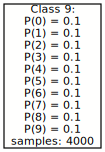

In [10]:
print(vfdTreeee.summary)
vfdTreeee.draw()

In [ ]:
# stream = ri.synth.ConceptDriftStream(stream=ri.synth.SEA(seed=42, noise =.28, variant =2),
#                                      drift_stream=ri.synth.SEA(seed=42, noise =.28, variant =3),
#                                      seed=42, position=24975,
#                                      width=50).take(50000)

# stream = ri.synth.LEDDrift(seed = 42, noise_percentage = 0.28,
#                           irrelevant_features= True, n_drift_features=4).take(2000)

# stream = ri.synth.RandomRBFDrift(seed_model=42, seed_sample=42,
#                                 n_classes=4, n_features=4, n_centroids=20,
#                                 change_speed=1.2, n_drift_centroids=10).take(50000)

# stream = ri.synth.ConceptDriftStream(seed=42, position=24975, width=50).take(50000)

stream = ri.synth.ConceptDriftStream(stream=ri.synth.Agrawal(seed=42, 
                                                             perturbation = .25, classification_function =0),
                                     drift_stream=ri.synth.Agrawal(seed=42, 
                                                                   perturbation = .1, classification_function = 2),
                                     seed=42, position=24900,
                                     width=200).take(50000)

adaptiveRandTree = ri.tree.HoeffdingAdaptiveTreeClassifier(seed=42)

adaptRandTreeMetric = ri.metrics.Accuracy()
ri.evaluate.progressive_val_score(stream, adaptiveRandTree, adaptRandTreeMetric,
                                  print_every = 5000, show_time = True, show_memory = True);

In [ ]:
# stream = ri.synth.ConceptDriftStream(stream=ri.synth.SEA(seed=42, noise =.28, variant =2),
#                                      drift_stream=ri.synth.SEA(seed=42, noise =.28, variant =3),
#                                      seed=42, position=24975,
#                                      width=50).take(50000)

# stream = ri.synth.LEDDrift(seed = 42, noise_percentage = 0.28,
#                           irrelevant_features= True, n_drift_features=4).take(2000)

# stream = ri.synth.RandomRBFDrift(seed_model=42, seed_sample=42,
#                                 n_classes=4, n_features=4, n_centroids=20,
#                                 change_speed=1.2, n_drift_centroids=10).take(50000)

# stream = ri.synth.ConceptDriftStream(seed=42, position=49750, width=50).take(100000)

stream = ri.synth.ConceptDriftStream(stream=ri.synth.Agrawal(seed=42, 
                                                             perturbation = .25, classification_function =0),
                                     drift_stream=ri.synth.Agrawal(seed=42, 
                                                                   perturbation = .1, classification_function = 2),
                                     seed=42, position=24900,
                                     width=200).take(50000)

adaptiveRandForest = ri.ensemble.AdaptiveRandomForestClassifier(seed=42)

adaptRandForMetric = ri.metrics.Accuracy()
ri.evaluate.progressive_val_score(stream, adaptiveRandForest, adaptRandForMetric,
                                  print_every = 5000, show_time = True, show_memory = True);

In [ ]:
# stream = ri.synth.ConceptDriftStream(stream=ri.synth.Agrawal(seed=42, classification_function =0),
#                                      drift_stream=ri.synth.Agrawal(seed=42, classification_function = 2),
#                                      seed=42, position=500,
#                                      width=50).take(1050)

# stream = ri.synth.LEDDrift(seed = 42, noise_percentage = 0.28,
#                           irrelevant_features= True, n_drift_features=4).take(2000)

# stream = ri.synth.RandomRBFDrift(seed_model=42, seed_sample=42,
#                                 n_classes=4, n_features=4, n_centroids=20,
#                                 change_speed=0.87, n_drift_centroids=10).take(2000)

stream = ri.synth.ConceptDriftStream(stream=ri.synth.Agrawal(seed=42,
                                                             perturbation = .25, classification_function =0),
                                     drift_stream=ri.synth.Agrawal(seed=42, 
                                                                   perturbation = .1, classification_function = 2),
                                     seed=42, position=24900,
                                     width=200).take(50000)

adaBoost = ri.ensemble.AdaBoostClassifier(model = ri.tree.HoeffdingTreeClassifier(), 
                                          seed=42)

adaBoostMetric = ri.metrics.Accuracy()
ri.evaluate.progressive_val_score(stream, adaBoost, adaBoostMetric,
                                  print_every = 5000, show_time = True, show_memory = True);

In [ ]:
# stream = ri.synth.ConceptDriftStream(stream=ri.synth.Agrawal(seed=42, classification_function =0),
#                                      drift_stream=ri.synth.Agrawal(seed=42, classification_function = 2),
#                                      seed=42, position=500,
#                                      width=50).take(1050)

# stream = ri.synth.LEDDrift(seed = 42, noise_percentage = 0.28,
#                           irrelevant_features= True, n_drift_features=4).take(2000)

# stream = ri.synth.RandomRBFDrift(seed_model=42, seed_sample=42,
#                                 n_classes=4, n_features=4, n_centroids=20,
#                                 change_speed=0.87, n_drift_centroids=10).take(2000)

stream = ri.synth.ConceptDriftStream(stream=ri.synth.Agrawal(seed=42, 
                                                             perturbation = .25, classification_function =0),
                                     drift_stream=ri.synth.Agrawal(seed=42, 
                                                                   perturbation = .1, classification_function = 2),
                                     seed=42, position=24900,
                                     width=200).take(50000)

adaBoost = ri.ensemble.AdaBoostClassifier(model = ri.tree.HoeffdingAdaptiveTreeClassifier(seed=42), 
                                          seed=42)

adaBoostMetric = ri.metrics.Accuracy()
ri.evaluate.progressive_val_score(stream, adaBoost, adaBoostMetric,
                                  print_every = 5000, show_time = True, show_memory = True);